In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import h5py as h5
import os
import glob
from os import walk
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.gridspec import GridSpec
from IPython.display import display, clear_output
from labexp import experiments
from mpl_toolkits.axes_grid1 import make_axes_locatable,ImageGrid
from mpl_toolkits.axes_grid1 import AxesGrid
from matplotlib.gridspec import GridSpec

In [3]:
def createImAmpl(datexprAmp):
    intVar=np.zeros([45,6])
    for j in np.linspace(0,44,45):
        dex=pd.Series(datexprAmp[int(j)])
        leng=np.size(dex)
        ind=0; flag=True; i=0
        while flag:
            if dex[i]==0:
                ind=i
                flag=False
            if i==leng-1:
                flag=False
            i+=1
        if ind!=0:
            ndex=dex[2:int(ind)]
        else:
            ndex=dex[2:]
        
        nlengdex=np.size(ndex)
        ndex=pd.concat([ndex,ndex[nlengdex-100:nlengdex-50]],ignore_index=True)
        ndex=(ndex-ndex.mean())/(ndex.max()+ndex.min())
        dat=ndex.diff()
        tt=dat.nlargest(n=6)
        tt=tt.sort_index()
        numtt=tt.to_numpy()
        intVar[int(j),:]=numtt
        
    return intVar

def figdat(arr,cmapS):
    fig = plt.figure(figsize=(13, 7))
    gs = GridSpec(1, 2, figure=fig,wspace=0.2,width_ratios=[2,1])
    
    ax1 = fig.add_subplot(gs[0, 0])
    ax2 =fig.add_subplot(gs[0, 1])
    
    npix1=0
    npix2=3
    
    ax1.set_xlabel(" $x$ $(\mu m)$")
    ax1.set_xticks(np.arange(0,44,4))
    ax1.set_xticklabels(np.arange(0,88,8))
    ax1.set_ylabel(" $y$ $(\mu m)$")
    ax1.set_yticks(np.arange(0,4,2))
    ax1.set_yticklabels(np.arange(0,8,4))
    ax1.imshow(arr,cmap=cmapS,aspect='auto',interpolation='gaussian')
    ax1.plot([0,45],[npix1,npix1],'r')
    ax1.plot([0,45],[npix2,npix2],'b')
    
    ax2.set_xlabel(" $x$ $(\mu m)$")
    ax2.set_xticks(np.arange(0,45,4))
    ax2.set_xticklabels(np.arange(0,90,8))
    ax2.set_ylabel(" $distance ~$ $(n m)$")

    ax2.plot(arr.T[:,npix1],'r')
    ax2.plot(arr.T[:,npix2],'b')
    
    plt.show()

In [4]:
exp = experiments(1,'nano','nsom','grating_InP')

|  No. Dir  | Name Dir                                         |  No. files  |
|-----------|--------------------------------------------------|-------------|
|     0     | nano/grating_InP/exp_2022-04/exp_2022_15_04_nsom |      2      |
|     1     | nano/grating_InP/exp_2022-04/exp_2022_18_04_nsom |      2      |
|     2     | nano/grating_InP/exp_2022-04/exp_2022_19_04_nsom |      2      |
|     3     | nano/grating_InP/exp_2022-04/exp_2022_20_04_nsom |      2      |
|     4     | nano/grating_InP/exp_2022-04/exp_2022_22_04_nsom |      6      |
|     5     | nano/grating_InP/exp_2022-04/exp_2022_23_04_nsom |      6      |
|     6     | nano/grating_InP/exp_2022-04/exp_2022_24_04_nsom |      4      |
|     7     | nano/grating_InP/exp_2022-04/exp_2022_25_04_nsom |      2      |
|     8     | nano/grating_InP/exp_2022-05/exp_2022_06_05_nsom |      6      |
|     9     | nano/grating_InP/exp_2022-05/exp_2022_07_05_nsom |      6      |
|    10     | nano/grating_InP/exp_2022-05/exp_2022_

In [5]:
dat=exp.data[5][2][:,:].T
datafm1=dat[0]; datlockin1=dat[1]; datmult1=dat[2]
dat2=exp.data[6][1][:,:].T
datafm2=dat2[0]; datlockin2=dat2[1]; datmult2=dat2[2]
dat3=exp.data[6][1][:,:].T
datafm3=dat3[0]; datlockin3=dat3[1]; datmult3=dat3[2]

promafm=(datafm3+datafm2+datafm1)/3; promlockin=(datlockin3+datlockin2+datlockin1)/3
promlockin=8.1e-5+promlockin

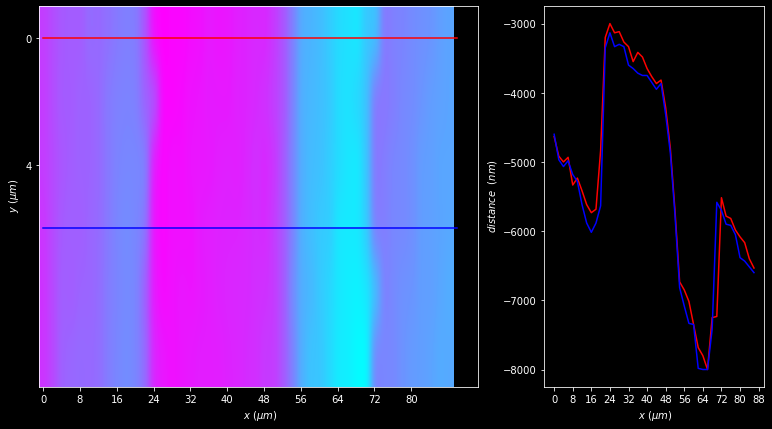

In [10]:
fig = plt.figure(figsize=(13, 7))
gs = GridSpec(1, 2, figure=fig,wspace=0.2,width_ratios=[2,1])
    
ax1 = fig.add_subplot(gs[0, 0])
ax2 =fig.add_subplot(gs[0, 1])
    
npix1=0
npix2=3
    
ax1.set_xlabel(" $x$ $(\mu m)$")
ax1.set_xticks(np.arange(0,44,4))
ax1.set_xticklabels(np.arange(0,88,8))
ax1.set_ylabel(" $y$ $(\mu m)$")
ax1.set_yticks(np.arange(0,4,2))
ax1.set_yticklabels(np.arange(0,8,4))
ax1.imshow(-promafm,cmap='cool',aspect='auto',interpolation='gaussian')
ax1.plot([0,45],[npix1,npix1],'r')
ax1.plot([0,45],[npix2,npix2],'b')
    
ax2.set_xlabel(" $x$ $(\mu m)$")
ax2.set_xticks(np.arange(0,45,4))
ax2.set_xticklabels(np.arange(0,90,8))
ax2.set_ylabel(" $distance ~$ $(n m)$")

ax2.plot(-promafm.T[1:,npix1],'r')
ax2.plot(-promafm.T[1:,npix2],'b')
    
plt.show()

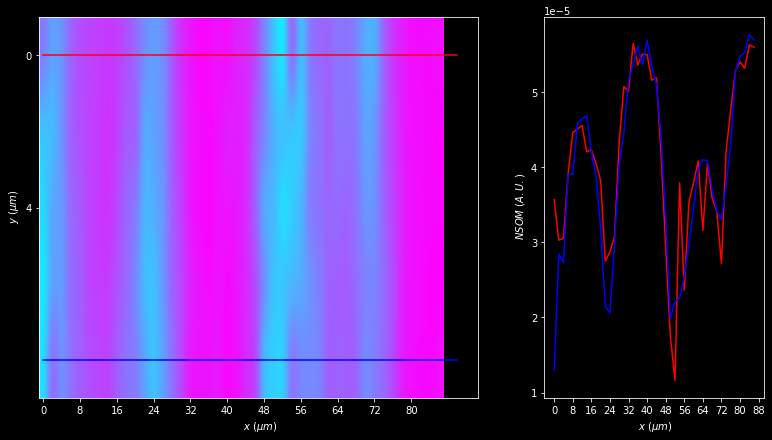

In [11]:
fig = plt.figure(figsize=(13, 7))
gs = GridSpec(1, 2, figure=fig,wspace=0.2,width_ratios=[2,1])
    
ax1 = fig.add_subplot(gs[0, 0])
ax2 =fig.add_subplot(gs[0, 1])
    
npix1=0
npix2=4
    
ax1.set_xlabel(" $x$ $(\mu m)$")
ax1.set_xticks(np.arange(0,44,4))
ax1.set_xticklabels(np.arange(0,88,8))
ax1.set_ylabel(" $y$ $(\mu m)$")
ax1.set_yticks(np.arange(0,4,2))
ax1.set_yticklabels(np.arange(0,8,4))
ax1.imshow(promlockin[1:,1:],cmap='cool',aspect='auto',interpolation='gaussian')
ax1.plot([0,45],[npix1,npix1],'r')
ax1.plot([0,45],[npix2,npix2],'b')
    
ax2.set_xlabel(" $x$ $(\mu m)$")
ax2.set_xticks(np.arange(0,45,4))
ax2.set_xticklabels(np.arange(0,90,8))
ax2.set_ylabel(" $NSOM$ $(A.U.)$")

ax2.plot(promlockin.T[1:,npix1],'r')
ax2.plot(promlockin.T[1:,npix2],'b')
    
plt.show()

In [15]:
from scipy import interpolate
from scipy.optimize import curve_fit

In [16]:
def func(x,a,b):
    return a*x+b

def afmCorr(Arr):
    afmTest=np.zeros((Arr.shape[0],Arr.shape[1]))
    for i in np.arange(0,Arr.shape[0],1):
        line=Arr[i,:]
        x=np.arange(0,line.size)
        popt, pcov = curve_fit(func, x, line)
        
        linef=func(x,*popt)
        afmTest[i,:]=line-linef
    
    return afmTest

In [17]:
datafmCorr=afmCorr(promafm)

datafmCorr=datafmCorr-2000;

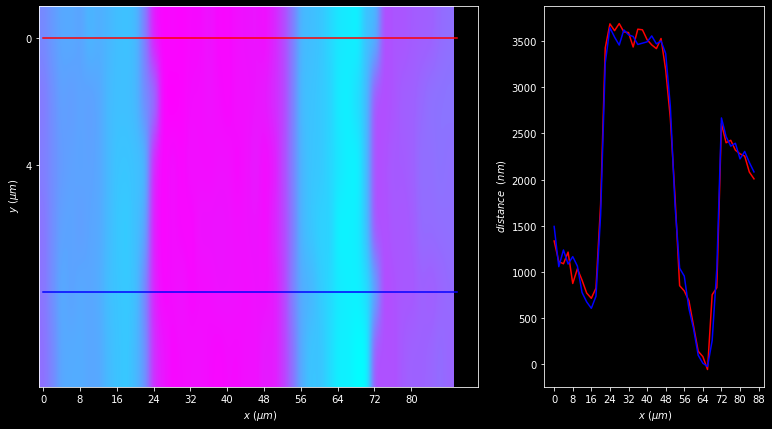

In [18]:
fig = plt.figure(figsize=(13, 7))
gs = GridSpec(1, 2, figure=fig,wspace=0.2,width_ratios=[2,1])
    
ax1 = fig.add_subplot(gs[0, 0])
ax2 =fig.add_subplot(gs[0, 1])
    
npix1=0
npix2=4
    
ax1.set_xlabel(" $x$ $(\mu m)$")
ax1.set_xticks(np.arange(0,44,4))
ax1.set_xticklabels(np.arange(0,88,8))
ax1.set_ylabel(" $y$ $(\mu m)$")
ax1.set_yticks(np.arange(0,4,2))
ax1.set_yticklabels(np.arange(0,8,4))
ax1.imshow(-datafmCorr,cmap='cool',aspect='auto',interpolation='gaussian')
ax1.plot([0,45],[npix1,npix1],'r')
ax1.plot([0,45],[npix2,npix2],'b')
    
ax2.set_xlabel(" $x$ $(\mu m)$")
ax2.set_xticks(np.arange(0,45,4))
ax2.set_xticklabels(np.arange(0,90,8))
ax2.set_ylabel(" $distance ~$ $(n m)$")

ax2.plot(-datafmCorr.T[1:,npix1],'r')
ax2.plot(-datafmCorr.T[1:,npix2],'b')
    
plt.show()

In [19]:
xi=0;xf=promlockin.shape[1]
yi=0;yf=promlockin.shape[0]
nx, ny = promlockin.shape[1], promlockin.shape[0]
X, Y = np.meshgrid(np.arange(0, nx, 1), np.arange(0, ny, 1))
Z1   =  promlockin[yi:yf,xi:xf]

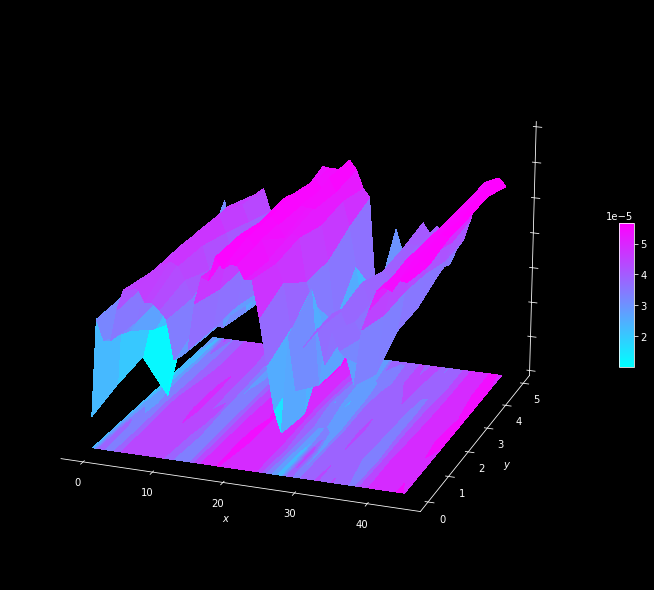

In [26]:
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,10))
fig.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)

#fig.canvas.layout.width = '100%'
#fig.canvas.layout.height = '500px'
ax = plt.axes(projection='3d')
surf=ax.plot_surface(X, Y,Z1,cmap=cm.cool, linewidth=1, antialiased=False)
ax.grid(False)

ax.xaxis.pane.set_edgecolor('#000000')
ax.xaxis.pane.set_linewidth(1)
ax.yaxis.pane.set_edgecolor('#000000')
ax.yaxis.pane.set_linewidth(1)
ax.zaxis.pane.set_edgecolor('#000000')
ax.zaxis.pane.set_linewidth(1)

ax.xaxis.pane.set_alpha(1)
ax.yaxis.pane.set_alpha(1)
ax.zaxis.pane.set_alpha(1)

ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

ax.set_zticklabels([])
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
ax.view_init(azim=-70,elev=20)

ax.contourf(X, Y,Z1,zdir='R',cmap=cm.cool,offset=0)
#ax.set_xlim(0,45)
#ax.set_ylim(0,7)

ax.set_zlim(0,7e-5)

fig.colorbar(surf, shrink=0.2, aspect=10)

plt.show()

In [27]:
xi=0;xf=datafmCorr.shape[1]
yi=0;yf=datafmCorr.shape[0]
nx, ny = datafmCorr.shape[1], promlockin.shape[0]
X, Y = np.meshgrid(np.arange(0, nx, 1), np.arange(0, ny, 1))
Z1   =  -datafmCorr[yi:yf,xi:xf]

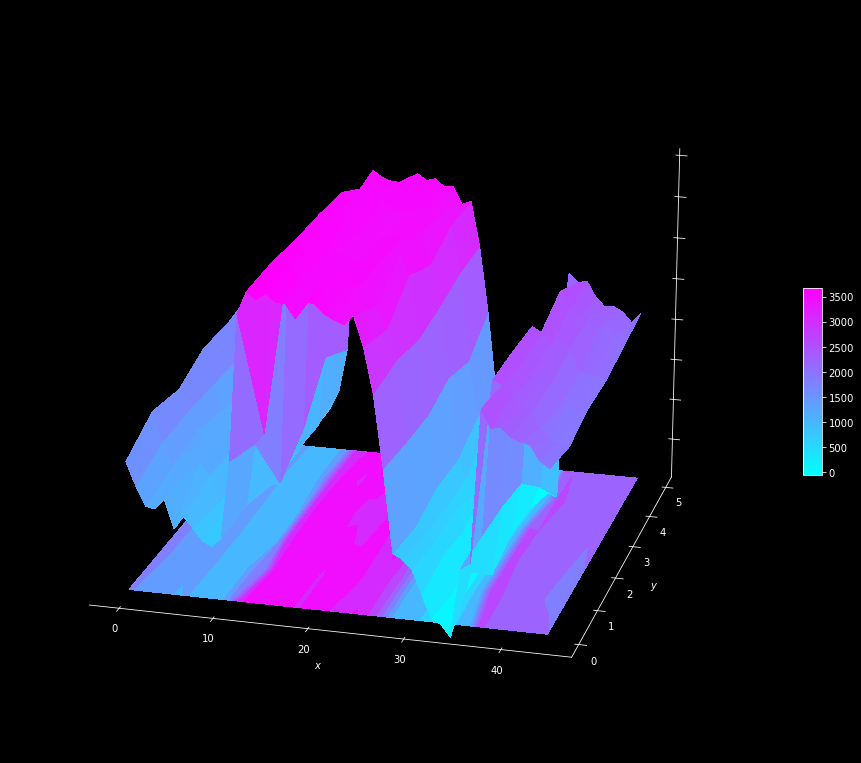

In [81]:
fig = plt.figure(figsize=(13,13))
fig.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)

#fig.canvas.layout.width = '100%'
#fig.canvas.layout.height = '500px'
ax = plt.axes(projection='3d')
surf=ax.plot_surface(X, Y,Z1,cmap=cm.cool, linewidth=1, antialiased=False)
ax.grid(False)

ax.xaxis.pane.set_edgecolor('#000000')
ax.xaxis.pane.set_linewidth(1)
ax.yaxis.pane.set_edgecolor('#000000')
ax.yaxis.pane.set_linewidth(1)
ax.zaxis.pane.set_edgecolor('#000000')
ax.zaxis.pane.set_linewidth(1)

ax.xaxis.pane.set_alpha(1)
ax.yaxis.pane.set_alpha(1)
ax.zaxis.pane.set_alpha(1)

ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

ax.set_zticklabels([])
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
ax.view_init(azim=-75,elev=20)

ax.contourf(X, Y,Z1,zdir='z',cmap=cm.cool,offset=100)
#ax.set_xlim(0,45)
#ax.set_ylim(0,7)

ax.set_zlim(100,4000)

fig.colorbar(surf, shrink=0.2, aspect=10)

plt.show()

In [54]:
leng=Z1.size
np.zeros((leng,3));
zr=np.reshape(Z1,(leng,1)); yr=np.reshape(Y,(leng,1)); xr=np.reshape(X,(leng,1));

ttest=np.vstack((2.0*xr.T,2.0*yr.T,zr.T))

armdat=ttest.T



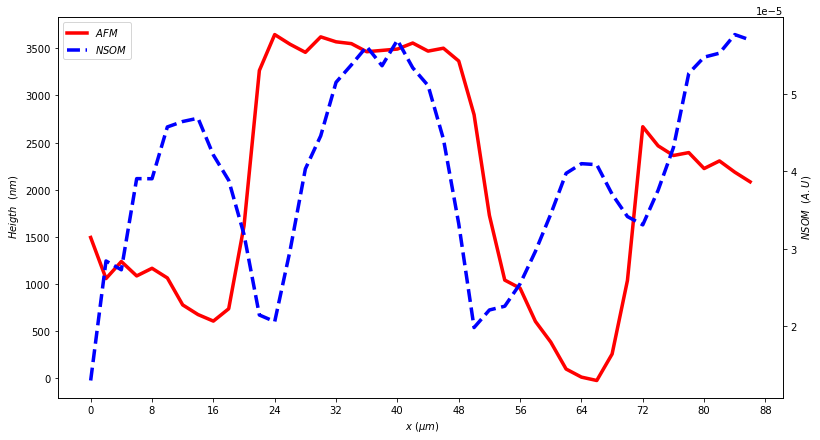

In [57]:
n=4

fig = plt.figure(figsize=(13, 7))

ax1=fig.add_subplot()
ax1.set_xlabel(" $x$ $(\mu m)$")
ax1.set_xticks(np.arange(0,45,4))
ax1.set_xticklabels(np.arange(0,90,8))
ax1.set_ylabel(" $Heigth ~$ $(n m)$")
l1, =ax1.plot(-datafmCorr.T[1:,n],color='r',ls='-', lw=3.5)

ax2=ax1.twinx()
ax2.set_ylabel(" $NSOM ~$ $(A.U)$")
l2, =ax2.plot(abs(promlockin.T[1:,n]),color='b', ls='--', lw=3.5)

plt.legend([l1, l2], ["$AFM$", "$NSOM$"])

plt.show()

In [74]:
ddaf=-datafmCorr.T[1:,n]; ddsn=promlockin.T[1:,n]
datx=np.arange(0,2*ddaf.size,2)
armdat=np.vstack((datx,ddaf,ddsn))
armdat.shape

(3, 44)

In [75]:
path='//media/labfiles/nsom/repos/lab-posters/2022-posters/sfm-poster-iico/report-nano/figures/result/compProf/'
name='compafmnsom.dat'
Pcomp=path+name

In [76]:
np.savetxt(Pcomp,armdat)

## 1 micro step

In [18]:
dat4=exp.data[7][0][:,:].T
datlockin4=dat4[1]; datafm4=dat4[0]

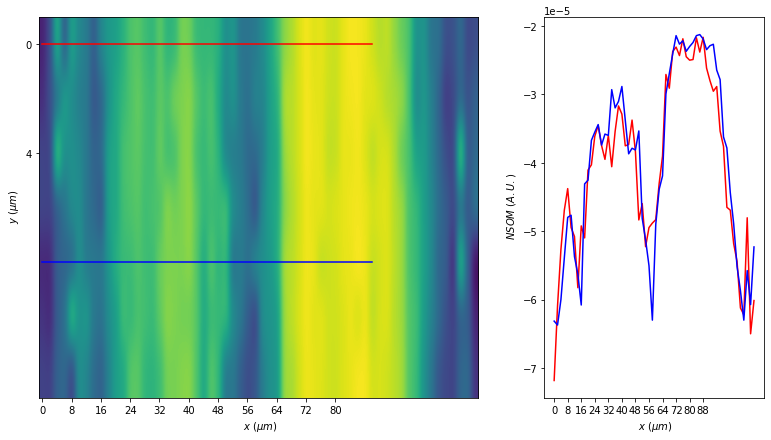

In [19]:
fig = plt.figure(figsize=(13, 7))
gs = GridSpec(1, 2, figure=fig,wspace=0.2,width_ratios=[2,1])
    
ax1 = fig.add_subplot(gs[0, 0])
ax2 =fig.add_subplot(gs[0, 1])
    
npix1=0
npix2=4
    
ax1.set_xlabel(" $x$ $(\mu m)$")
ax1.set_xticks(np.arange(0,44,4))
ax1.set_xticklabels(np.arange(0,88,8))
ax1.set_ylabel(" $y$ $(\mu m)$")
ax1.set_yticks(np.arange(0,4,2))
ax1.set_yticklabels(np.arange(0,8,4))
ax1.imshow(datlockin4[1:,1:],cmap='viridis',aspect='auto',interpolation='gaussian')
ax1.plot([0,45],[npix1,npix1],'r')
ax1.plot([0,45],[npix2,npix2],'b')
    
ax2.set_xlabel(" $x$ $(\mu m)$")
ax2.set_xticks(np.arange(0,45,4))
ax2.set_xticklabels(np.arange(0,90,8))
ax2.set_ylabel(" $NSOM$ $(A.U.)$")

ax2.plot(datlockin4.T[1:,npix1],'r')
ax2.plot(datlockin4.T[1:,npix2],'b')
    
plt.show()